In [396]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [397]:
past_data=pd.read_csv("C:\Python\INNHotelsGroup_pastdata.csv")

In [398]:
new_data=pd.read_csv("C:\Python\INNHotelsGroup_newdata.csv")

In [399]:
past_data.shape

(27093, 12)

In [400]:
new_data.shape

(3583, 11)

#Descriptive statistics

In [401]:
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [402]:
past_data.describe(include=object).T

,count,unique,top,freq
booking_id,27093,27093,INNHG_101034,1
market_segment_type,27093,2,Online,18456
arrival_date,27093,439,2021-03-19,279
booking_status,27093,2,Not Canceled,18236
rebooked,8857,2,No,7092


In [403]:
#corelation heatmap

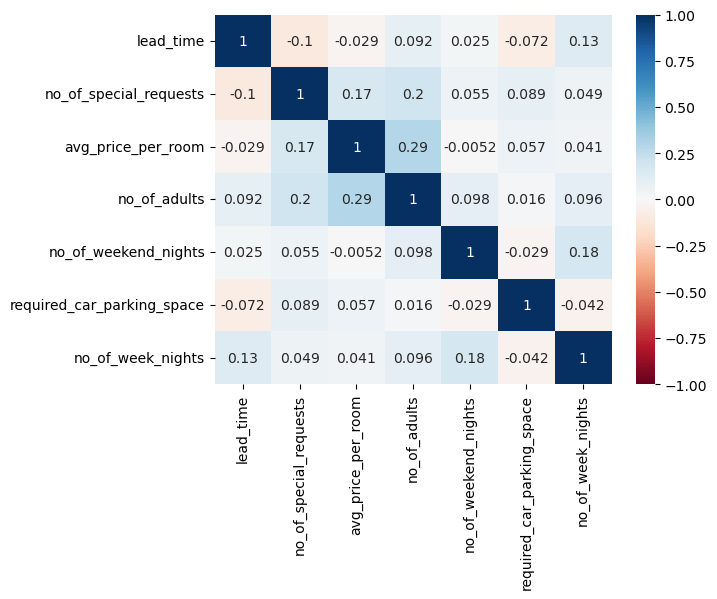

In [404]:
sns.heatmap(past_data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

In [405]:
#we need to assign correct dtypes to col

In [406]:
past_data.dtypes

booking_id                     object
lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
booking_status                 object
rebooked                       object
dtype: object

In [407]:
actual_y=new_data['booking_status']

In [408]:
new_data.drop(columns='booking_status',inplace=True)

In [409]:
new_data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2


In [410]:
#lets join these both data we call them data

In [411]:
data= pd.concat([past_data,new_data],axis=0)

In [412]:
data

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No
...,...,...,...,...,...,...,...,...,...,...,...,...
3578,INNHG_131705,258,Online,1,106.20,2,0,2022-09-29,0,1,NaN,NaN
3579,INNHG_131706,263,Online,0,100.30,2,2,2022-09-29,0,4,NaN,NaN
3580,INNHG_131707,185,Online,2,116.10,2,2,2022-09-29,0,3,NaN,NaN
3581,INNHG_131708,214,Online,0,120.90,2,0,2022-09-29,0,3,NaN,NaN


In [413]:
#change datatype of arrival date to datetime
data['arrival_date']=pd.to_datetime(data['arrival_date'])

In [414]:
data.dtypes

booking_id                            object
lead_time                              int64
market_segment_type                   object
no_of_special_requests                 int64
avg_price_per_room                   float64
no_of_adults                           int64
no_of_weekend_nights                   int64
arrival_date                  datetime64[ns]
required_car_parking_space             int64
no_of_week_nights                      int64
booking_status                        object
rebooked                              object
dtype: object

In [415]:
data['arrival_date'].dt.isocalendar()

,year,week,day
0,2020,53,5
1,2020,53,5
2,2020,53,5
3,2020,53,5
4,2020,53,5
...,...,...,...
3578,2022,39,4
3579,2022,39,4
3580,2022,39,4
3581,2022,39,4


In [416]:
data['Arrival_Day']=data['arrival_date'].dt.day
data['Arrival_Month']=data['arrival_date'].dt.month
data['Arrival_Date']=data['arrival_date'].dt.weekday


In [417]:
data.drop(columns=['booking_id','arrival_date'],inplace=True)

In [418]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,rebooked,Arrival_Day,Arrival_Month,Arrival_Date
0,0,Online,0,85.03,1,1,0,0,Not Canceled,NaN,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,NaN,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,NaN,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,NaN,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,No,1,1,4


DATA ANALYSIS

In [419]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'rebooked', 'Arrival_Day', 'Arrival_Month', 'Arrival_Date'],
      dtype='object')

In [420]:
num_cols=['lead_time','avg_price_per_room','Arrival_Day']
cat_cols=['market_segment_type', 'no_of_special_requests','no_of_adults', 'no_of_weekend_nights','required_car_parking_space', 'no_of_week_nights', 'booking_status','rebooked','Arrival_Month', 'Arrival_Date']

UNIVARIATE ANALYSIS

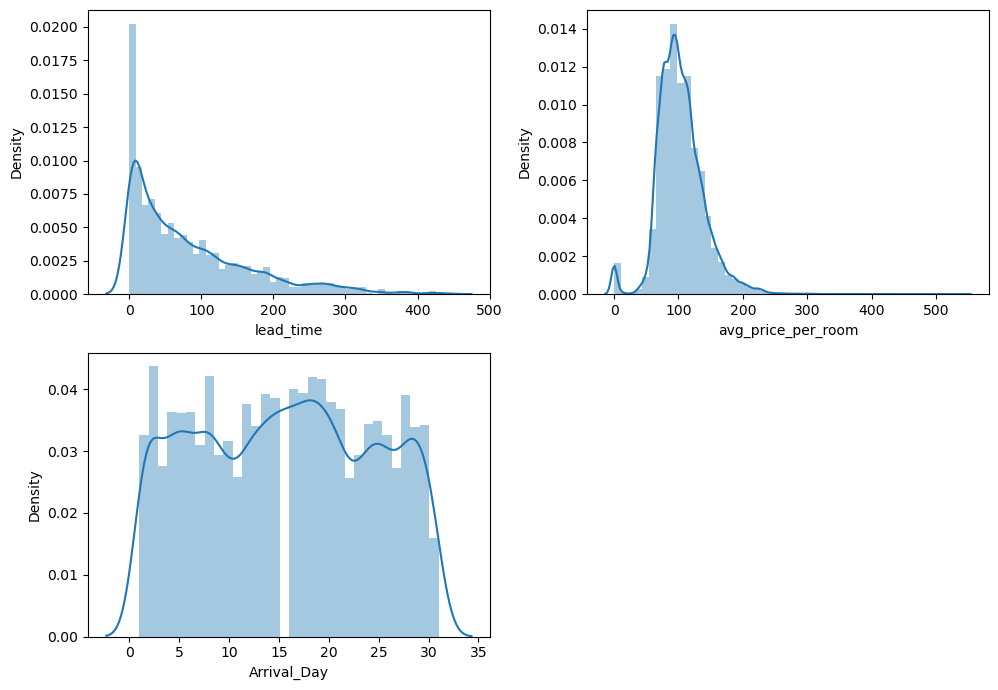

In [421]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(data[i])
    t+=1
    
plt.tight_layout()
plt.show()

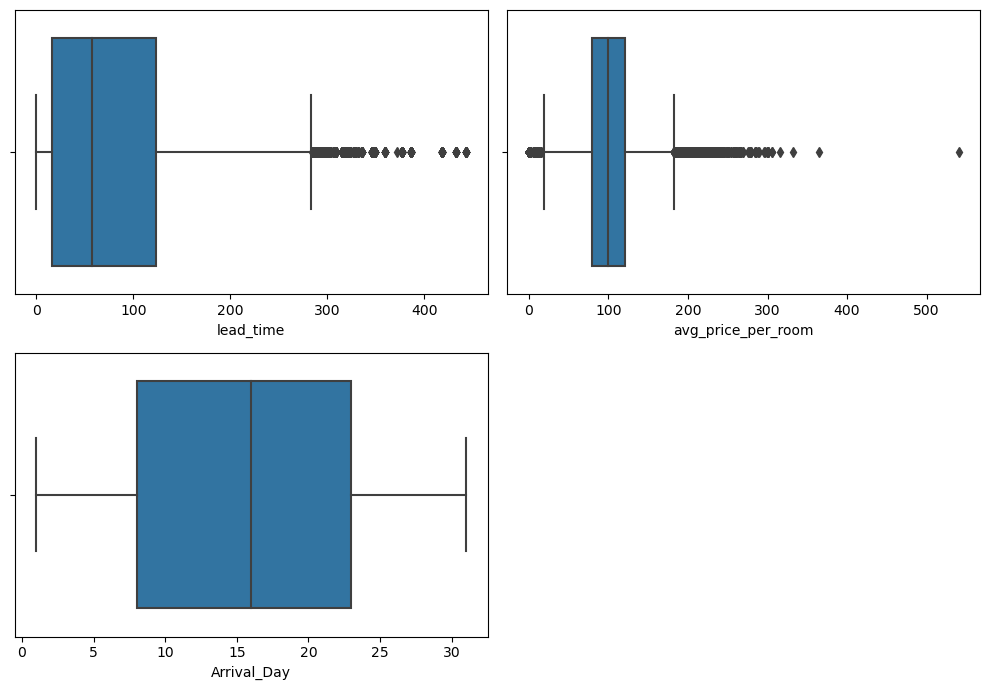

In [422]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [423]:
for i in cat_cols:
    print(data[i].value_counts().index)

Index(['Online', 'Offline'], dtype='object', name='market_segment_type')
Index([0, 1, 2, 3, 4, 5], dtype='int64', name='no_of_special_requests')
Index([2, 1, 3, 0, 4], dtype='int64', name='no_of_adults')
Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64', name='no_of_weekend_nights')
Index([0, 1], dtype='int64', name='required_car_parking_space')
Index([2, 1, 3, 4, 0, 5, 6, 7, 8, 10, 9, 11, 15, 12, 14, 13, 17, 16], dtype='int64', name='no_of_week_nights')
Index(['Not Canceled', 'Canceled'], dtype='object', name='booking_status')
Index(['No', 'Yes'], dtype='object', name='rebooked')
Index([4, 3, 6, 5, 2, 9, 1, 8, 10, 7, 12, 11], dtype='int32', name='Arrival_Month')
Index([4, 5, 0, 6, 2, 3, 1], dtype='int32', name='Arrival_Date')


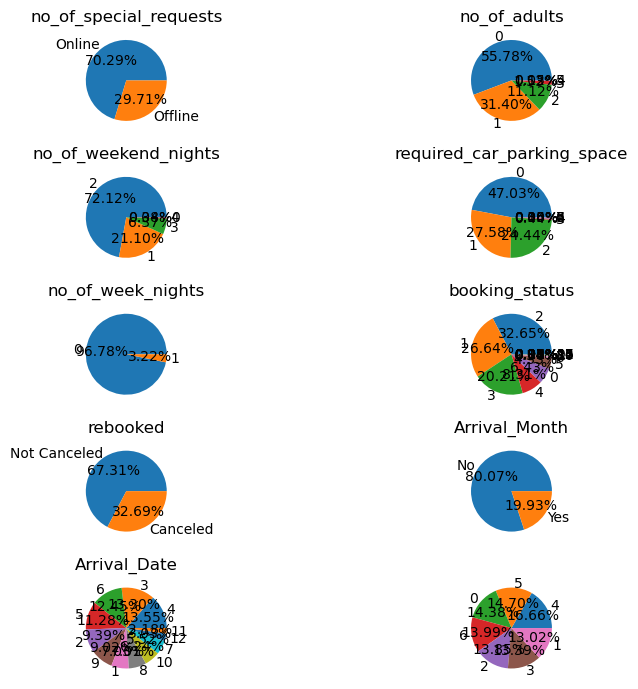

In [424]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
    plt.title(i)
    plt.subplot(5,2,t)
    plt.pie(data[i].value_counts(),autopct='%.2f%%',labels=data[i].value_counts().index)
    t+=1
    
plt.tight_layout()
plt.show()

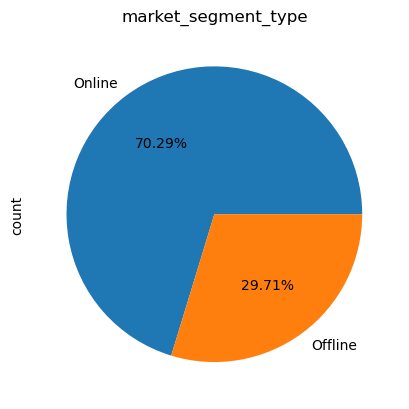

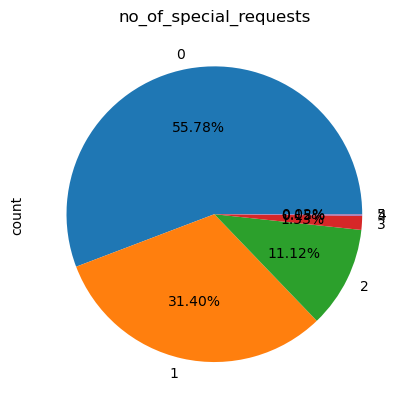

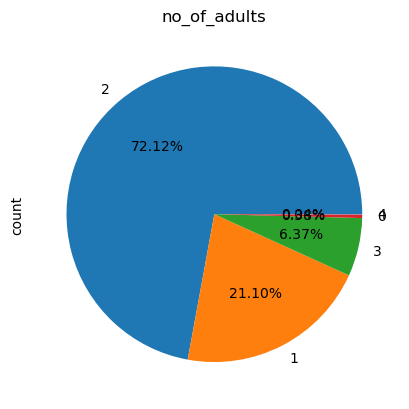

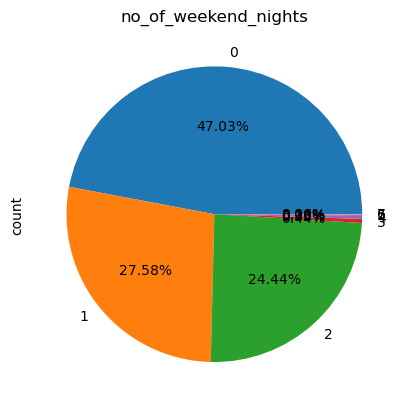

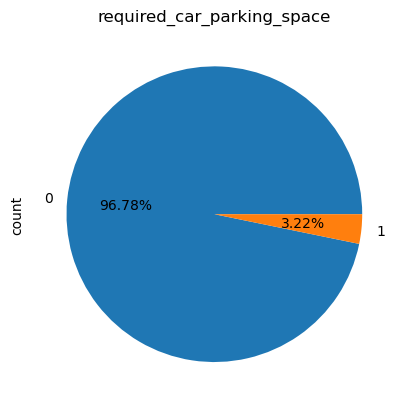

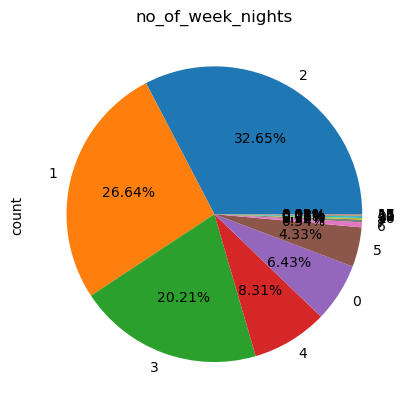

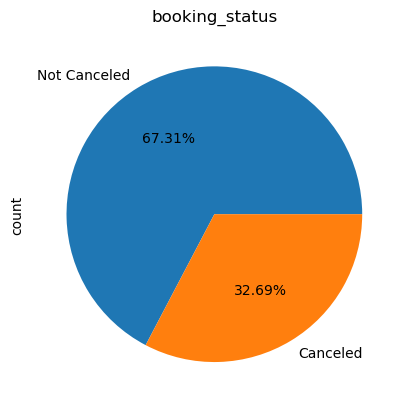

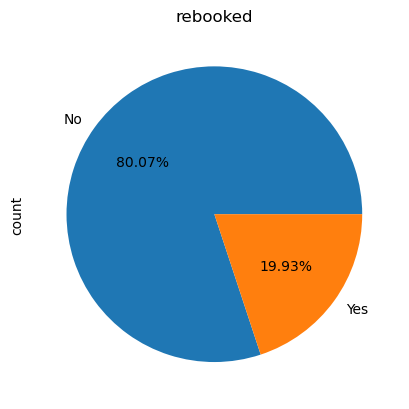

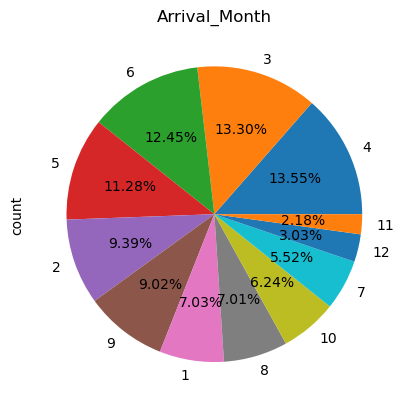

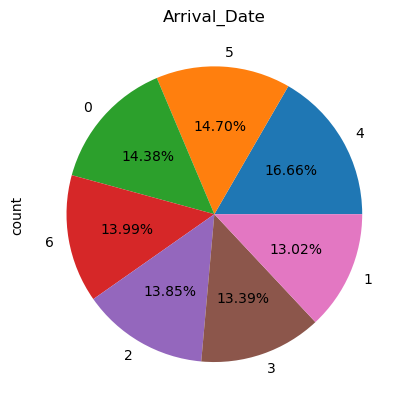

In [425]:
for i in cat_cols:
    plt.title(i)
    data[i].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1)
    plt.show()

In [426]:
## names not coming check

#infrences
there are few bookings where lead time > 300
there are few bookings where avg price per room is zero and for some rooms it is >300
approx 70% bookings are made online
most of the booking have either 1 special req or none
most of the rooms have been booked for couples or single occupants
most of the bookings are spending 0,1,2 weekend nights
97% bookings do not require parking space
most of the bookings are for 1,2,3 weeknights
cancellation are appx 33%



REBOOKED DATA

In [427]:
data.groupby(by=['booking_status','rebooked'])['rebooked'].count()

booking_status  rebooked
Canceled        No          7092
                Yes         1765
Name: rebooked, dtype: int64

In [428]:
data['rebooked'].value_counts(normalize=True)

rebooked
No     0.800723
Yes    0.199277
Name: proportion, dtype: float64

<Axes: xlabel='booking_status'>

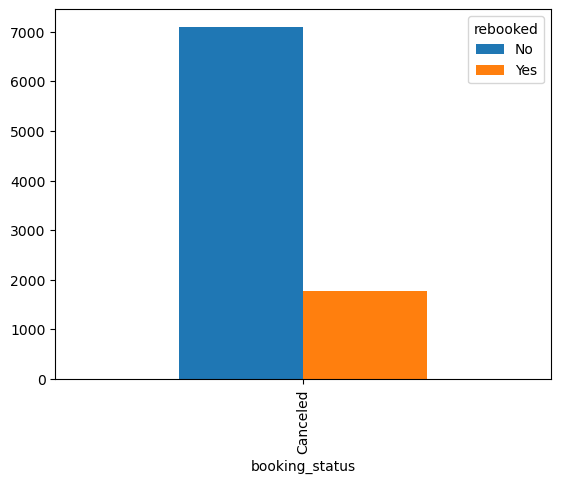

In [429]:
pd.crosstab(data['booking_status'],data['rebooked']).plot(kind='bar')

#inference
out of 33% cancellation,80% of them were not rebooked this brings huge loss to the company this is majorly 
coz cancelation have been made last minute.
we can address this problem by making a prediction about cancellation way before time (can be done via predictive modelling)

BIVARIATE ANALYSIS

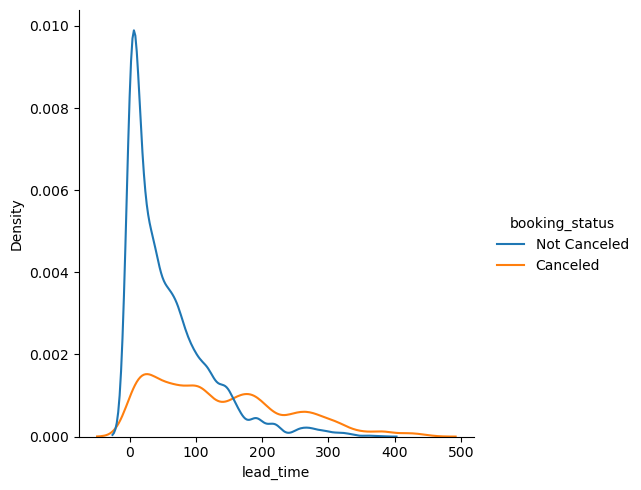

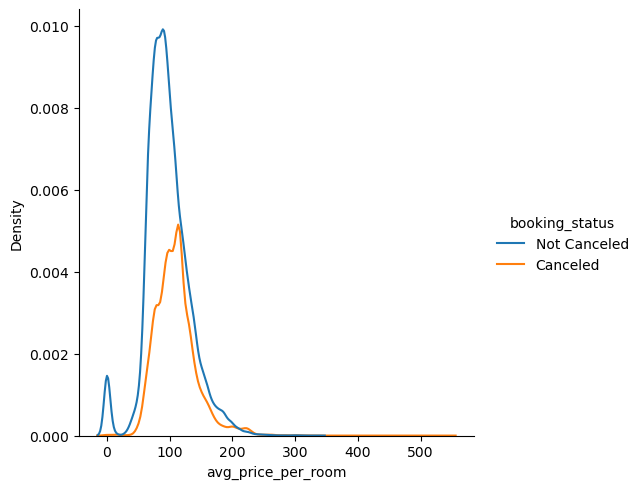

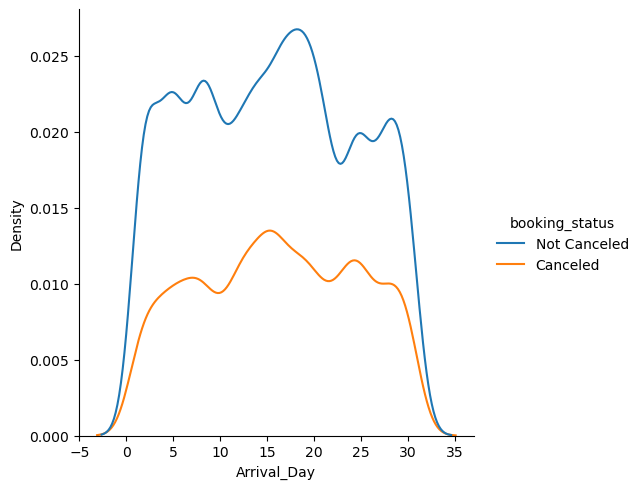

In [430]:
for i in num_cols:
    sns.displot(x=data[i],kind='kde',hue=data['booking_status'])
    plt.show()

In [431]:
#CAT VS CAT

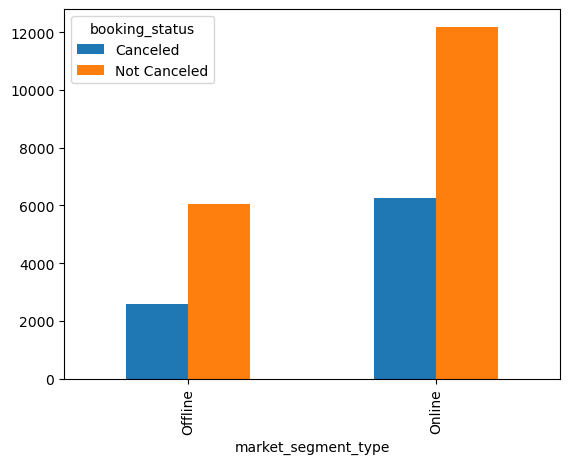

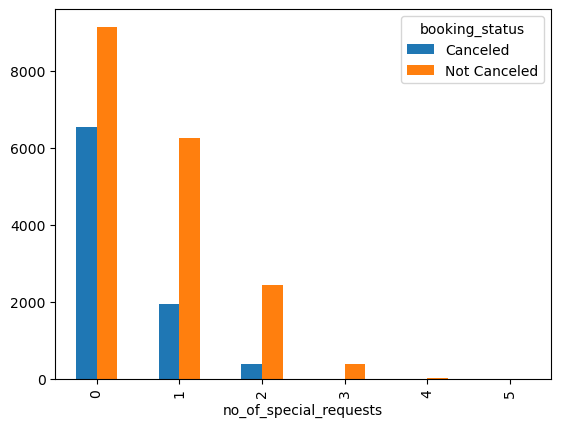

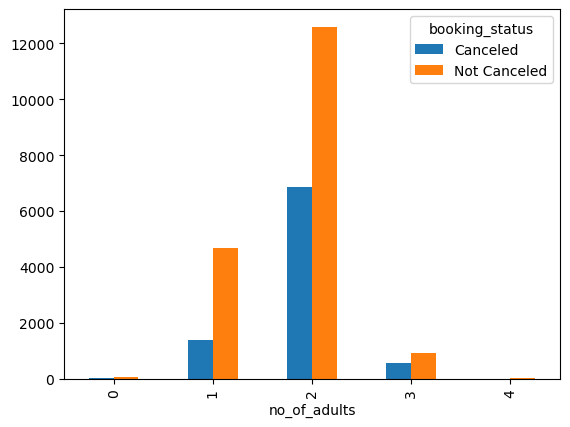

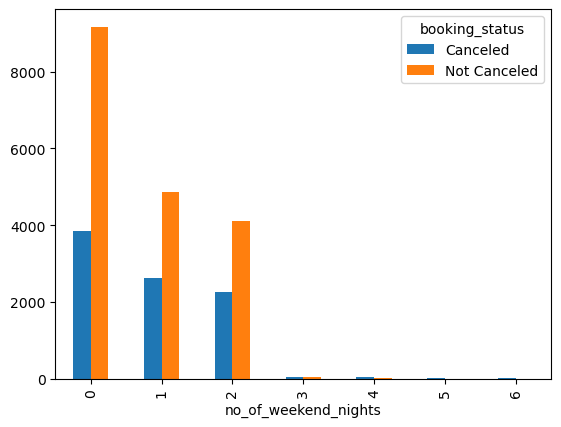

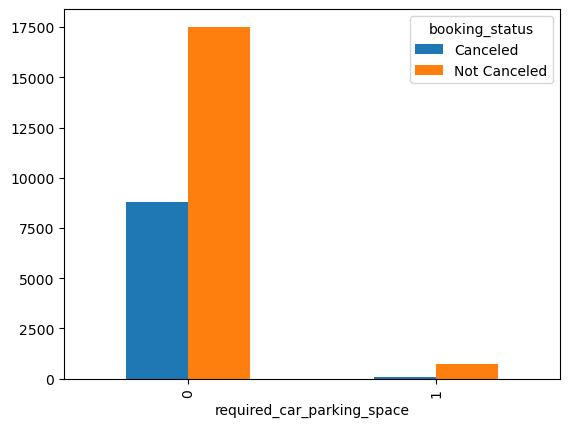

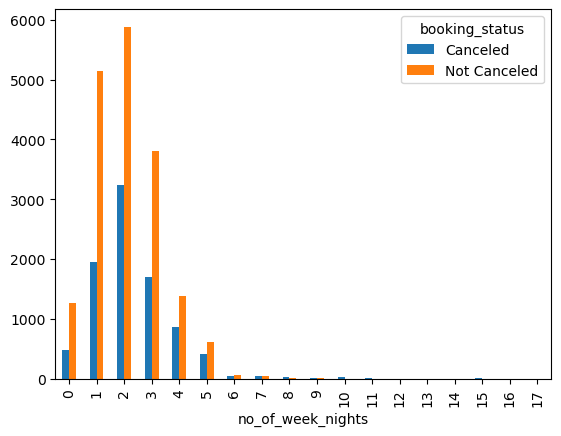

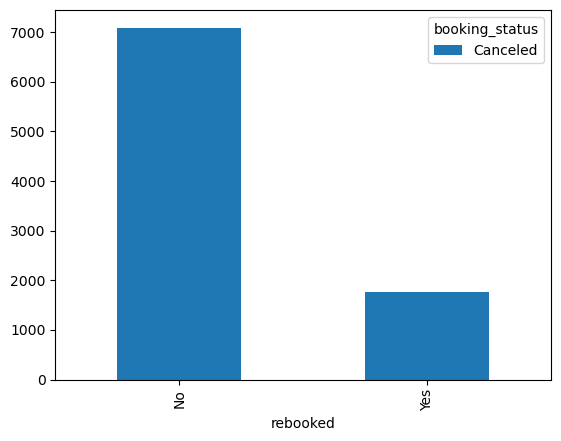

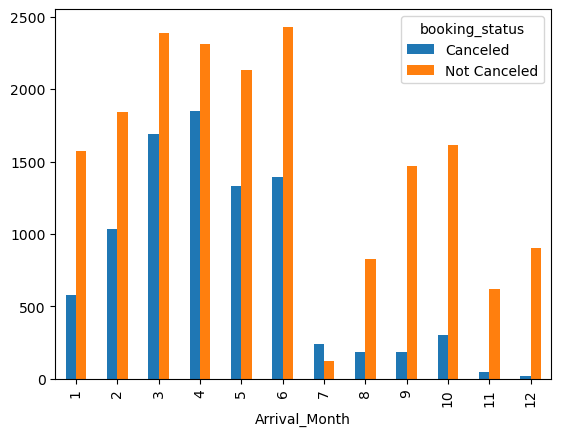

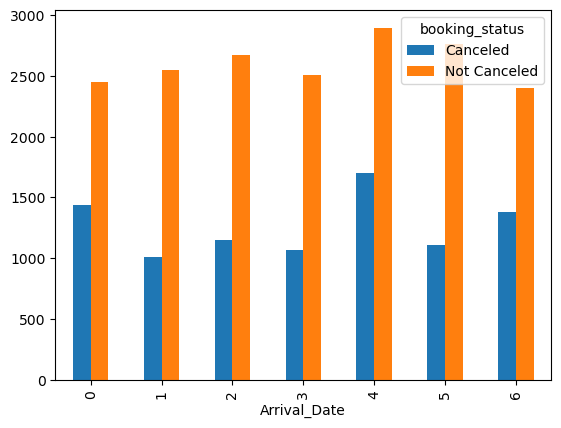

In [432]:
for i in cat_cols:
    if i!='booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

#inference
more cancellation when there are no special req
couples genrally cancel the booking

STATISTICAL ANALYSIS(INFRENTIAL STATS)

num Vs CAT

In [433]:
num_cols

['lead_time', 'avg_price_per_room', 'Arrival_Day']

In [434]:
#apply 2 sample t test 

ho: no relation b/w num col and target bokking status
ha:there is relation b/w num_col and booking_status

In [435]:
import scipy.stats as stats

In [436]:
stats.shapiro(data['lead_time'])

ShapiroResult(statistic=0.858092188835144, pvalue=0.0)

In [437]:
stats.shapiro(data['avg_price_per_room'])

ShapiroResult(statistic=0.9544830918312073, pvalue=0.0)

In [438]:
stats.shapiro(data['Arrival_Day'])

ShapiroResult(statistic=0.9567803740501404, pvalue=0.0)

In [439]:
#data not normal apply non parameteric test in this case mann whitney u

In [440]:
for i in num_cols:
    sample1=data[data['booking_status']=='Not Canceled'][i]
    sample2=data[data['booking_status']=='Canceled'][i]
    print(i,':',stats.mannwhitneyu(sample1,sample2))

lead_time : MannwhitneyuResult(statistic=40528570.5, pvalue=0.0)
avg_price_per_room : MannwhitneyuResult(statistic=61814361.0, pvalue=4.950381137183313e-216)
Arrival_Day : MannwhitneyuResult(statistic=77648486.5, pvalue=2.5710270847504093e-07)


In [441]:
#all pvalues are < 0.05 so we reject the null hypothesis

In [442]:
#cat v/s cat

In [443]:
for i in cat_cols:
    if i!= 'booking_status':
        tbl=pd.crosstab(data[i],data['booking_status'])
        print(i,'p_value:',stats.chi2_contingency(tbl)[1])

market_segment_type p_value: 7.806389643886697e-11
no_of_special_requests p_value: 0.0
no_of_adults p_value: 1.4411855115006094e-73
no_of_weekend_nights p_value: 5.324997086476798e-43
required_car_parking_space p_value: 5.626905783478662e-49
no_of_week_nights p_value: 7.318602549508705e-65
rebooked p_value: 1.0
Arrival_Month p_value: 0.0
Arrival_Date p_value: 2.0528217585454624e-36


except rebboked all other categories have relation with TARGET(booking_status)

DATA PREPROCESSING


In [444]:
#we cannot include rebooking in model as this info is only available when booking is canceled which we have to predict

In [445]:
data.drop(columns='rebooked',inplace=True)

In [446]:
data.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,Arrival_Day,Arrival_Month,Arrival_Date
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4


In [447]:
# check for null value or missing values

MISSING VALUES

In [448]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
Arrival_Day                      0
Arrival_Month                    0
Arrival_Date                     0
dtype: int64

In [449]:
# no missing values as we have to predict the booking status

OUTLIER TREATMENT

In [450]:
train=data[data['booking_status'].notnull()]
test=data[data['booking_status'].isnull()]

In [451]:
#remove/capping outliers

In [452]:
num_cols

['lead_time', 'avg_price_per_room', 'Arrival_Day']

In [453]:
for i in num_cols:
    q3,q1=np.percentile(train[i],[75,25])
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    train.loc[train[i]>ul,i]=ul
    train.loc[train[i]<ll,i]=ll
    print(train[train[i]==ul][i])

82       274
689      274
692      274
697      274
699      274
        ... 
25841    274
25852    274
25859    274
25868    274
25890    274
Name: lead_time, Length: 1213, dtype: int64
22       179.0
33       179.0
76       179.0
147      179.0
202      179.0
         ...  
26926    179.0
26980    179.0
26990    179.0
27019    179.0
27074    179.0
Name: avg_price_per_room, Length: 730, dtype: float64
Series([], Name: Arrival_Day, dtype: float64)


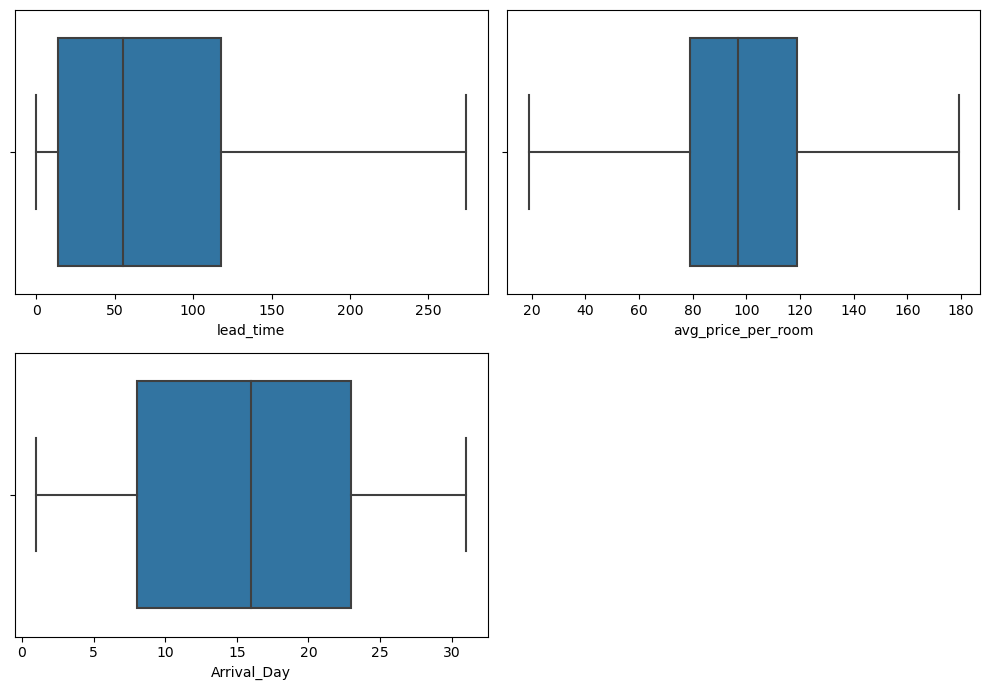

In [454]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=train[i])
    t+=1
    
plt.tight_layout()
plt.show()

ENCODING

In [455]:
train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,Arrival_Day,Arrival_Month,Arrival_Date
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1.0,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1.0,1,4


In [456]:
train.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'Arrival_Day', 'Arrival_Month', 'Arrival_Date'],
      dtype='object')

In [457]:
train.describe(include='object').T

,count,unique,top,freq
market_segment_type,27093,2,Online,18456
booking_status,27093,2,Not Canceled,18236


In [458]:
train['booking_status']=train['booking_status'].map({'Canceled':1,'Not Canceled':0})
train['market_segment_type']=pd.get_dummies(train['market_segment_type'],dtype=int,drop_first=True)
test['market_segment_type']=pd.get_dummies(test['market_segment_type'],dtype=int,drop_first=True)

In [459]:
test.shape

(3583, 12)

In [460]:
test.drop(columns='booking_status',inplace=True)

In [461]:
train

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,Arrival_Day,Arrival_Month,Arrival_Date
0,0,1,0,85.03,1,1,0,0,0,1.0,1,4
1,34,1,2,125.10,2,2,0,0,0,1.0,1,4
2,24,1,1,71.69,2,2,0,0,0,1.0,1,4
3,23,1,0,84.70,1,2,0,0,0,1.0,1,4
4,46,1,1,149.40,2,2,0,3,1,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
27088,113,0,0,85.00,2,1,0,3,1,30.0,6,3
27089,11,1,1,139.00,2,0,0,3,1,30.0,6,3
27090,35,1,0,117.90,2,0,0,3,1,30.0,6,3
27091,68,1,1,131.40,2,0,0,2,1,30.0,6,3


TRAIN TEST SPLIT

In [462]:
x_test=test
y_test=actual_y.map({'Canceled':1,'Not Canceled':0})
                     
x_train=train.drop(columns='booking_status')
y_train=train['booking_status']

In [463]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27093, 11) (27093,) (3583, 11) (3583,)


###PRDEICTIVE MODELLING

In [464]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [465]:
mod=[]
accu=[]
prec=[]
rec=[]
f1=[]
kappa=[]

def model_validation(model,x_train,y_train,x_test,y_test):
    m=model
    m.fit(x_train,y_train)
    pred_h=m.predict(x_test)
    pred_s=m.predict_proba(x_test)[:,1]
    
    print('confusion matrix\n',confusion_matrix(y_test,pred_h))
    print('Classification report\n',classification_report(y_test,pred_h))
    fpr,tpr,thres=roc_curve(y_test,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC {round(roc_auc_score(y_test,pred_s),2)}')
    plt.show()
    
    response=input('Do u want to save the model')
    
    if response.lower()=='y':
        global scorecard
        mod.append(str(m))
        accu.append(accuracy_score(y_test,pred_h))
        rec.append(recall_score(y_test,pred_h))
        prec.append(precision_score(y_test,pred_h))
        f1.append(f1_score(y_test,pred_h))
        kappa.append(cohen_kappa_score(y_test,pred_h))

        scorecard=pd.DataFrame({'Model':mod
                                ,'Accuracy':accu,
                                'Precison':prec,
                                'Recall':rec,
                                'f-1score':f1
                                ,'cohen kappa':kappa})
        
    else:
        return
            

confusion matrix
 [[2163  220]
 [ 558  642]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.74      0.54      0.62      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.74      3583
weighted avg       0.78      0.78      0.77      3583



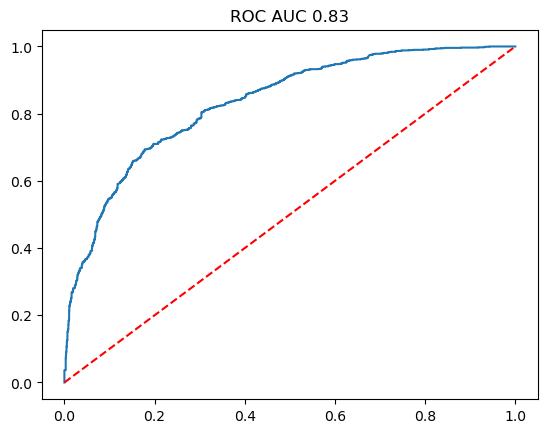

Do u want to save the model


In [466]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [469]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.5875,0.590452,0.385772


confusion matrix
 [[1900  483]
 [ 495  705]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      2383
           1       0.59      0.59      0.59      1200

    accuracy                           0.73      3583
   macro avg       0.69      0.69      0.69      3583
weighted avg       0.73      0.73      0.73      3583



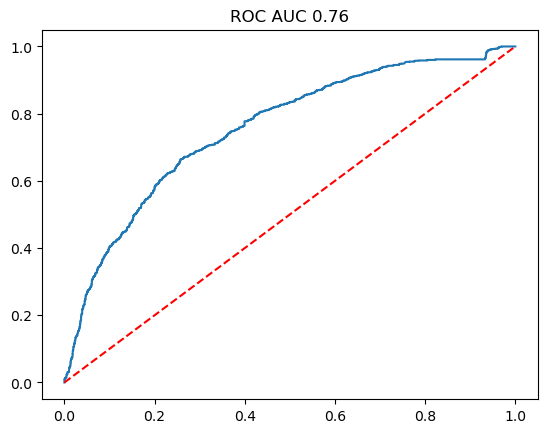

Do u want to save the modely


In [470]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

In [471]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.5875,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.5875,0.590452,0.385772


confusion matrix
 [[2167  216]
 [ 359  841]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.80      0.70      0.75      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.81      0.81      3583
weighted avg       0.84      0.84      0.84      3583



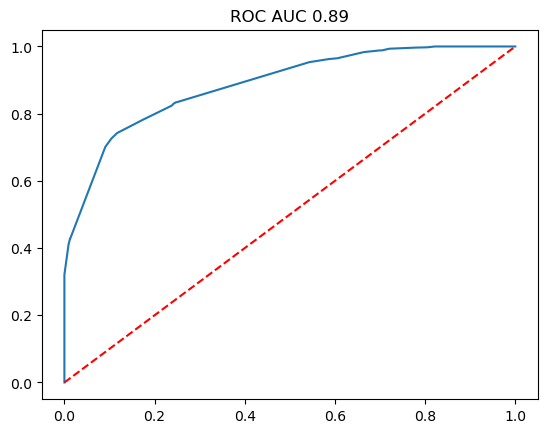

Do u want to save the modely


In [472]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

In [473]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
2,DecisionTreeClassifier(max_depth=5),0.839520,0.795648,0.700833,0.745237,0.628790


In [474]:
#random forest

confusion matrix
 [[2154  229]
 [ 345  855]]
Classification report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2383
           1       0.79      0.71      0.75      1200

    accuracy                           0.84      3583
   macro avg       0.83      0.81      0.82      3583
weighted avg       0.84      0.84      0.84      3583



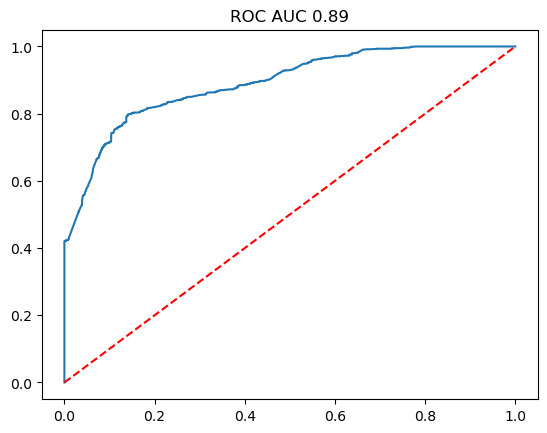

Do u want to save the modely


In [475]:
model_validation(RandomForestClassifier(n_estimators=150,max_features=11,max_depth=5),x_train,y_train,x_test,y_test)

In [476]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
2,DecisionTreeClassifier(max_depth=5),0.839520,0.795648,0.700833,0.745237,0.628790
3,"RandomForestClassifier(max_depth=5, max_featur...",0.839799,0.788745,0.712500,0.748687,0.631556


confusion matrix
 [[2125  258]
 [ 472  728]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2383
           1       0.74      0.61      0.67      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.75      0.76      3583
weighted avg       0.79      0.80      0.79      3583



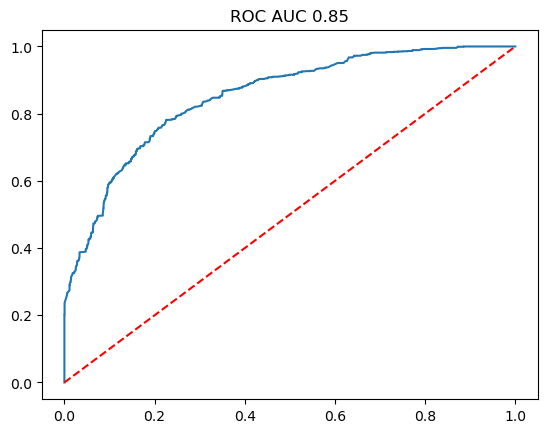

Do u want to save the modely


In [477]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [478]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
2,DecisionTreeClassifier(max_depth=5),0.839520,0.795648,0.700833,0.745237,0.628790
3,"RandomForestClassifier(max_depth=5, max_featur...",0.839799,0.788745,0.712500,0.748687,0.631556
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.796260,0.738337,0.606667,0.666057,0.521483


confusion matrix
 [[1791  592]
 [ 266  934]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      2383
           1       0.61      0.78      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.76      0.75      3583
weighted avg       0.78      0.76      0.77      3583



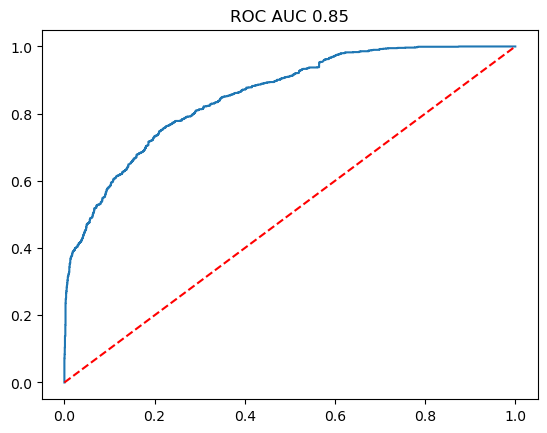

Do u want to save the modely


In [479]:
model_validation(GradientBoostingClassifier(max_depth=7,n_estimators=200,learning_rate=0.1),x_train,y_train,x_test,y_test)

In [480]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
2,DecisionTreeClassifier(max_depth=5),0.839520,0.795648,0.700833,0.745237,0.628790
3,"RandomForestClassifier(max_depth=5, max_featur...",0.839799,0.788745,0.712500,0.748687,0.631556
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.796260,0.738337,0.606667,0.666057,0.521483
5,"GradientBoostingClassifier(max_depth=7, n_esti...",0.760536,0.612058,0.778333,0.685253,0.496432


confusion matrix
 [[1791  592]
 [ 270  930]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      2383
           1       0.61      0.78      0.68      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.76      0.74      3583
weighted avg       0.78      0.76      0.76      3583



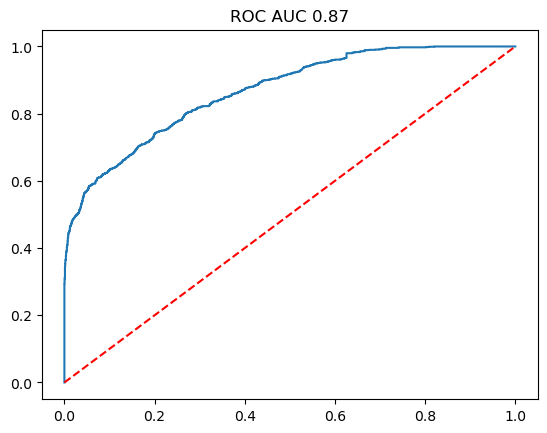

Do u want to save the modely


In [481]:
model_validation(XGBClassifier(n_estimators=250,learning_rate=0.1,max_depth=5),x_train,y_train,x_test,y_test)

In [482]:
scorecard

,Model,Accuracy,Precison,Recall,f-1score,cohen kappa
0,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
1,GaussianNB(),0.727044,0.593434,0.587500,0.590452,0.385772
2,DecisionTreeClassifier(max_depth=5),0.839520,0.795648,0.700833,0.745237,0.628790
3,"RandomForestClassifier(max_depth=5, max_featur...",0.839799,0.788745,0.712500,0.748687,0.631556
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.796260,0.738337,0.606667,0.666057,0.521483
5,"GradientBoostingClassifier(max_depth=7, n_esti...",0.760536,0.612058,0.778333,0.685253,0.496432
6,"XGBClassifier(base_score=None, booster=None, c...",0.759419,0.611038,0.775000,0.683321,0.493691


#The best model is Random forest classifier

VOTING

In [484]:
base_estimators=[('DT',DecisionTreeClassifier(max_depth=7)),('RF',RandomForestClassifier())]

Model Deployment

In [485]:
#lets save the model
import pickle

In [ ]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)